# Hypothesis Tests for Correlations and Distributions

This tutorial assumes you have had a basic [introduction](https://github.com/capprogram/2021bootcamp/blob/master/hypothesistests/BasicStatsI.pdf) to statistics.

Author: Sheila Kannappan
Last Modified: November 2019

## Setup

If you're looking at this notebook, you've presumably already followed these instructions. Please take a moment to complete any that you have not yet finished.

 * go to https://jupyter.org/try
 * click "Try JupyterLab"
 * close open tabs in the Lab (not necessary, just less confusing)
 * open a terminal in the Lab (File>New>Terminal)
 * paste the following into the terminal to get the jupyter notebook:<br/>
  `wget https://raw.githubusercontent.com/astrosheila/hypothesistests/master/hypothesistests.ipynb -P /home/jovyan/demo`
 * paste the following into the terminal to get the input file:<br/>
  `wget https://raw.githubusercontent.com/astrosheila/hypothesistests/master/anscombe.txt -P /home/jovyan/demo` <br>
 * if necessary, click the refresh page (curled arrow) at the top of the webpage
 * launch the jupyter notebook and open the two python codes by double clicking on them
 * you can run or re-run individual cells in the notebook by clicking on them and typing Ctrl-Enter

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# ipython "magic" to enable static plot output directly to notebook
%matplotlib inline

## Correlation Tests

Correlation tests are a special case of hypothesis tests, which:

* Need not involve a model; may be “non-parametric”
* Return the probability of the null hypothesis

For correlation tests, the null hypothesis is that the two data sets have no association.

In [2]:
# pearson vs. spearman rank [and kendall tau] correlation tests
data=np.loadtxt("anscombe.txt")
# four data sets all of which have linear fits y = 3.00 + 0.500x
# and nearly identical statistics (mean, sigma, linear correlation coeff.)
# used to illustrate the importance of LOOKING AT YOUR DATA
x1=data[:,0]
y1=data[:,1]
x2=data[:,2]
y2=data[:,3]
x3=data[:,4]
y3=data[:,5]
x4=data[:,6]
y4=data[:,7]

Text(0.5, 1.0, 'standard')

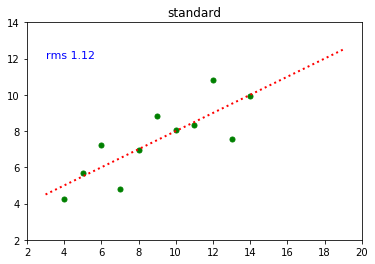

In [3]:
# standard data set
plt.plot(x1, y1,'g.',markersize=10)
testxvals=np.array([3.,7.,11.,15.,19.]) # use to make line
plt.plot(testxvals,3.+0.5*testxvals,'r',linestyle=':',linewidth=2.)
rms=np.sqrt(np.mean((y1-(3.+0.5*x1))**2))
plt.text(3,12,'rms %0.2f' % rms,size=11,color='b')
# notice how the "plt.text" command works
plt.xlim(2,20)
plt.ylim(2,14)
plt.title('standard')

Text(0.5, 1.0, 'curved')

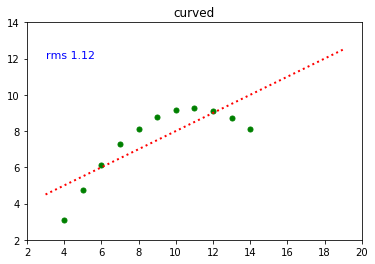

In [4]:
# curved data set
plt.plot(x2, y2,'g.',markersize=10)
plt.plot(testxvals,3.+0.5*testxvals,'r',linestyle=':',linewidth=2.)
rms=np.sqrt(np.mean((y2-(3.+0.5*x2))**2))
plt.text(3,12,'rms %0.2f' % rms,size=11,color='b')
plt.xlim(2,20)
plt.ylim(2,14)
plt.title('curved')

Text(0, 0.5, 'y')

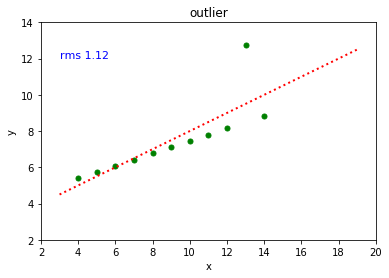

In [5]:
# bad outlier data set
plt.plot(x3, y3,'g.',markersize=10)
plt.plot(testxvals,3.+0.5*testxvals,'r',linestyle=':',linewidth=2.)
rms=np.sqrt(np.mean((y3-(3.+0.5*x3))**2))
plt.text(3,12,'rms %0.2f' % rms,size=11,color='b')
plt.xlim(2,20)
plt.ylim(2,14)
plt.title('outlier')
plt.xlabel('x')
plt.ylabel('y')

Text(0.5, 1.0, 'garbage')

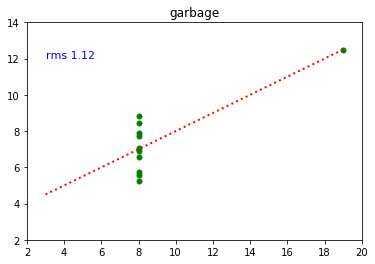

In [6]:
# garbage data set
plt.plot(x4, y4,'g.',markersize=10)
plt.plot(testxvals,3.+0.5*testxvals,'r',linestyle=':',linewidth=2.)
rms=np.sqrt(np.mean((y4-(3.+0.5*x4))**2))
plt.text(3,12,'rms %0.2f' % rms,size=11,color='b')
plt.xlim(2,20)
plt.ylim(2,14)
plt.title('garbage')

In [7]:
#define sigma symbol as a string for use on plots
sigmasym=r'$\sigma$'

 
Standard:
Spearman rank correlation coefficient 0.818182
Spearman rank probability of no correlation 0.002083
Pearson correlation coefficient 0.816421
Pearson probability of no correlation 0.002170


Text(8.5, 4, 'Pearson 3.1$\\sigma$')

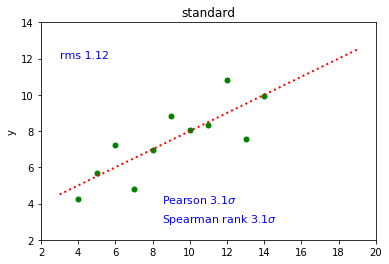

In [10]:
plt.plot(x1, y1,'g.',markersize=10)
testxvals=np.array([3.,7.,11.,15.,19.]) # use to make line
plt.plot(testxvals,3.+0.5*testxvals,'r',linestyle=':',linewidth=2.)
rms=np.sqrt(np.mean((y1-(3.+0.5*x1))**2))
plt.text(3,12,'rms %0.2f' % rms,size=11,color='b')
# notice how the "plt.text" command works
plt.xlim(2,20)
plt.ylim(2,14)
plt.title('standard')
plt.ylabel('y')

print(" ")
print("Standard:")

# Spearman rank correlation test
cc,pnull=stats.spearmanr(x1,y1)
# pnull is returned as a 2-sided p-value by spearmanr, pearsonr, kendalltau
# print info to screen
print("Spearman rank correlation coefficient %f" % cc)
print("Spearman rank probability of no correlation %f" % pnull)
# convert pnull to equivalent confidence expressed as # sigma for Gaussian
confidence=stats.norm.interval(1-pnull) # fill in with enclosed prob. (0 to 1)
# note that by default "interval" assumes a Gaussian of mean 0 and sigma 1
# returns 2-sided upper & lower c.i. bounds
# add expression of confidence as # sigma to plot at position (x,y)=(8.5,3)
leveltext='Spearman rank %0.1f' % confidence[1]
plt.text(8.5,3,leveltext+sigmasym, size=11, color='b')

# Pearson correlation test
cc,pnull=stats.pearsonr(x1,y1)
print("Pearson correlation coefficient %f" % cc)
print("Pearson probability of no correlation %f" % pnull)
confidence=stats.norm.interval(1-pnull)
leveltext='Pearson %0.1f' % confidence[1]
plt.text(8.5,4,leveltext+sigmasym, size=11, color='b')

# now try adding stats.kendalltau by analogy

 
Standard:
Spearman rank correlation coefficient 0.818182
Spearman rank probability of no correlation 0.002083
Pearson correlation coefficient 0.816421
Pearson probability of no correlation 0.002170
Kendall tau correlation coefficient 0.636364
Kendall tau probability of no correlation 0.005707
 
Curved:
Spearman rank correlation coefficient 0.690909
Spearman rank probability of no correlation 0.018565
Pearson correlation coefficient 0.816237
Pearson probability of no correlation 0.002179
Kendall tau correlation coefficient 0.563636
Kendall tau probability of no correlation 0.016541
 
Outlier:
Spearman rank correlation coefficient 0.990909
Spearman rank probability of no correlation 0.000000
Pearson correlation coefficient 0.816287
Pearson probability of no correlation 0.002176
Kendall tau correlation coefficient 0.963636
Kendall tau probability of no correlation 0.000001
 
Garbage:
Spearman rank correlation coefficient 0.500000
Spearman rank probability of no correlation 0.117307
Pear

Text(8.5, 5, 'Kendall tau 1.6$\\sigma$')

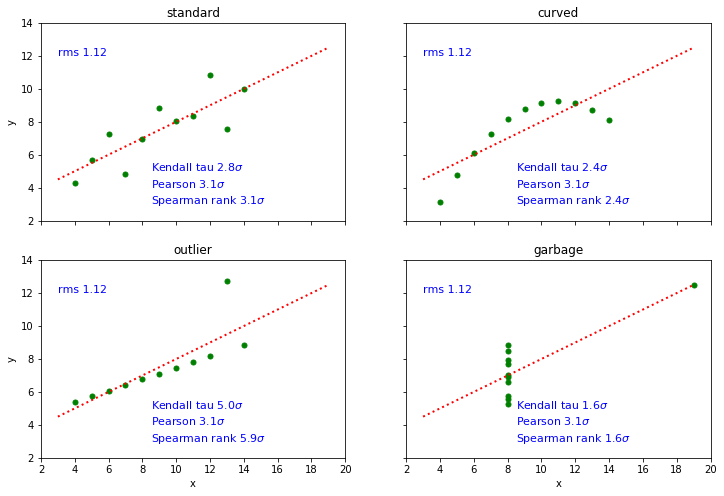

In [11]:
# multi-panel plotting (see http://matplotlib.org/users/pyplot_tutorial.html)
plt.figure(1,figsize=(12, 8))
plt.clf()

# standard data set
ax1=plt.subplot(221) # 2 rows x 2 columns of plots, 1st plot (top left)
plt.plot(x1, y1,'g.',markersize=10)
testxvals=np.array([3.,7.,11.,15.,19.]) # use to make line
plt.plot(testxvals,3.+0.5*testxvals,'r',linestyle=':',linewidth=2.)
rms=np.sqrt(np.mean((y1-(3.+0.5*x1))**2))
plt.text(3,12,'rms %0.2f' % rms,size=11,color='b')
# notice how the "plt.text" command works
plt.xlim(2,20)
plt.ylim(2,14)
plt.title('standard')
plt.ylabel('y')
plt.setp(ax1.get_xticklabels(), visible=False) # hide its xlabels

print(" ")
print("Standard:")
# Spearman rank correlation test
cc,pnull=stats.spearmanr(x1,y1)
print("Spearman rank correlation coefficient %f" % cc)
print("Spearman rank probability of no correlation %f" % pnull)
# convert pnull to equivalent confidence expressed as # sigma for Gaussian
confidence=stats.norm.interval(1-pnull) # fill in with enclosed prob. (0 to 1)
# note that by default "interval" assumes a Gaussian of mean 0 and sigma 1
# returns 2-sided upper & lower c.i. bounds
# add expression of confidence as # sigma to plot at position (x,y)=(8.5,3)
leveltext='Spearman rank %0.1f' % confidence[1]
plt.text(8.5,3,leveltext+sigmasym, size=11, color='b')
# Pearson correlation test
cc,pnull=stats.pearsonr(x1,y1)
print("Pearson correlation coefficient %f" % cc)
print("Pearson probability of no correlation %f" % pnull)
confidence=stats.norm.interval(1-pnull)
leveltext='Pearson %0.1f' % confidence[1]
plt.text(8.5,4,leveltext+sigmasym, size=11, color='b')
# Kendall tau correlation test
cc,pnull=stats.kendalltau(x1,y1)
print("Kendall tau correlation coefficient %f" % cc)
print("Kendall tau probability of no correlation %f" % pnull)
confidence=stats.norm.interval(1-pnull)
leveltext='Kendall tau %0.1f' % confidence[1]
plt.text(8.5,5,leveltext+sigmasym, size=11, color='b')

# curved data set
ax2=plt.subplot(222) # 2 rows x 2 columns of plots, 2nd plot (top right)
plt.plot(x2, y2,'g.',markersize=10)
plt.plot(testxvals,3.+0.5*testxvals,'r',linestyle=':',linewidth=2.)
rms=np.sqrt(np.mean((y2-(3.+0.5*x2))**2))
plt.text(3,12,'rms %0.2f' % rms,size=11,color='b')
plt.xlim(2,20)
plt.ylim(2,14)
plt.title('curved')
plt.setp(ax2.get_xticklabels(), visible=False) # hide its xlabels
plt.setp(ax2.get_yticklabels(), visible=False) # hide its ylabels

print(" ")
print("Curved:")
# Spearman rank correlation test
cc,pnull=stats.spearmanr(x2,y2)
print("Spearman rank correlation coefficient %f" % cc)
print("Spearman rank probability of no correlation %f" % pnull)
# convert pnull to equivalent confidence expressed as # sigma for Gaussian
confidence=stats.norm.interval(1-pnull) # fill in with enclosed prob. (0 to 1)
# note that by default "interval" assumes a Gaussian of mean 0 and sigma 1
# returns 2-sided upper & lower c.i. bounds
# add expression of confidence as # sigma to plot at position (x,y)=(8.5,3)
leveltext='Spearman rank %0.1f' % confidence[1]
plt.text(8.5,3,leveltext+sigmasym, size=11, color='b')
# Pearson correlation test
cc,pnull=stats.pearsonr(x2,y2)
print("Pearson correlation coefficient %f" % cc)
print("Pearson probability of no correlation %f" % pnull)
confidence=stats.norm.interval(1-pnull)
leveltext='Pearson %0.1f' % confidence[1]
plt.text(8.5,4,leveltext+sigmasym, size=11, color='b')
# Kendall tau correlation test
cc,pnull=stats.kendalltau(x2,y2)
print("Kendall tau correlation coefficient %f" % cc)
print("Kendall tau probability of no correlation %f" % pnull)
confidence=stats.norm.interval(1-pnull)
leveltext='Kendall tau %0.1f' % confidence[1]
plt.text(8.5,5,leveltext+sigmasym, size=11, color='b')

# bad outlier data set
ax3=plt.subplot(223) # 2 rows x 2 columns of plots, 3rd plot (bottom left)
plt.plot(x3, y3,'g.',markersize=10)
plt.plot(testxvals,3.+0.5*testxvals,'r',linestyle=':',linewidth=2.)
rms=np.sqrt(np.mean((y3-(3.+0.5*x3))**2))
plt.text(3,12,'rms %0.2f' % rms,size=11,color='b')
plt.xlim(2,20)
plt.ylim(2,14)
plt.title('outlier')
plt.xlabel('x')
plt.ylabel('y')

print(" ")
print("Outlier:")
# Spearman rank correlation test
cc,pnull=stats.spearmanr(x3,y3)
print("Spearman rank correlation coefficient %f" % cc)
print("Spearman rank probability of no correlation %f" % pnull)
# convert pnull to equivalent confidence expressed as # sigma for Gaussian
confidence=stats.norm.interval(1-pnull) # fill in with enclosed prob. (0 to 1)
# note that by default "interval" assumes a Gaussian of mean 0 and sigma 1
# returns 2-sided upper & lower c.i. bounds
# add expression of confidence as # sigma to plot at position (x,y)=(8.5,3)
leveltext='Spearman rank %0.1f' % confidence[1]
plt.text(8.5,3,leveltext+sigmasym, size=11, color='b')
# Pearson correlation test
cc,pnull=stats.pearsonr(x3,y3)
print("Pearson correlation coefficient %f" % cc)
print("Pearson probability of no correlation %f" % pnull)
confidence=stats.norm.interval(1-pnull)
leveltext='Pearson %0.1f' % confidence[1]
plt.text(8.5,4,leveltext+sigmasym, size=11, color='b')
# Kendall tau correlation test
cc,pnull=stats.kendalltau(x3,y3)
print("Kendall tau correlation coefficient %f" % cc)
print("Kendall tau probability of no correlation %f" % pnull)
confidence=stats.norm.interval(1-pnull)
leveltext='Kendall tau %0.1f' % confidence[1]
plt.text(8.5,5,leveltext+sigmasym, size=11, color='b')

# garbage data set
ax4=plt.subplot(224)
plt.plot(x4, y4,'g.',markersize=10)
plt.plot(testxvals,3.+0.5*testxvals,'r',linestyle=':',linewidth=2.)
rms=np.sqrt(np.mean((y4-(3.+0.5*x4))**2))
plt.text(3,12,'rms %0.2f' % rms,size=11,color='b')
plt.xlim(2,20)
plt.ylim(2,14)
plt.title('garbage')
plt.xlabel('x')
plt.setp(ax4.get_yticklabels(), visible=False) # hide its ylabels

print(" ")
print("Garbage:")
# Spearman rank correlation test
cc,pnull=stats.spearmanr(x4,y4)
print("Spearman rank correlation coefficient %f" % cc)
print("Spearman rank probability of no correlation %f" % pnull)
# convert pnull to equivalent confidence expressed as # sigma for Gaussian
confidence=stats.norm.interval(1-pnull) # fill in with enclosed prob. (0 to 1)
# note that by default "interval" assumes a Gaussian of mean 0 and sigma 1
# returns 2-sided upper & lower c.i. bounds
# add expression of confidence as # sigma to plot at position (x,y)=(8.5,3)
leveltext='Spearman rank %0.1f' % confidence[1]
plt.text(8.5,3,leveltext+sigmasym, size=11, color='b')
# Pearson correlation test
cc,pnull=stats.pearsonr(x4,y4)
print("Pearson correlation coefficient %f" % cc)
print("Pearson probability of no correlation %f" % pnull)
confidence=stats.norm.interval(1-pnull)
leveltext='Pearson %0.1f' % confidence[1]
plt.text(8.5,4,leveltext+sigmasym, size=11, color='b')
# Kendall tau correlation test
cc,pnull=stats.kendalltau(x4,y4)
print("Kendall tau correlation coefficient %f" % cc)
print("Kendall tau probability of no correlation %f" % pnull)
confidence=stats.norm.interval(1-pnull)
leveltext='Kendall tau %0.1f' % confidence[1]
plt.text(8.5,5,leveltext+sigmasym, size=11, color='b')

### The Wrap

Now that you've seen the plots, take a look at the companion slides on correlations [here](https://github.com/capprogram/2021bootcamp/blob/master/hypothesistests/BasicStatsII.pdf).

Also, google and/or discuss the [p-value crisis](https://en.wikipedia.org/wiki/Misuse_of_p-values).

## Distributions

In [13]:
# read in some data
data = np.genfromtxt("ECO_dr1_subset.csv", delimiter=",", dtype=None, names=True, encoding=None)
name = data['NAME']
logmstar = data ['LOGMSTAR']
urcolor = data['MODELU_RCORR']
cz = data['CZ']
goodur = (urcolor > -99) & (logmstar > 10.)
colors=urcolor[goodur]

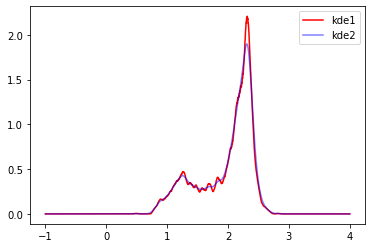

In [16]:
# KDE plots are much nicer than histograms
from sklearn.neighbors import KernelDensity

plt.figure(1)
plt.clf()
xx = np.linspace(-1,4,10000)[:,np.newaxis]
bw1=0.05
bw2=0.05
kde1 = KernelDensity(kernel='epanechnikov',bandwidth=bw1).fit(colors[:,np.newaxis])
logdens1 = kde1.score_samples(xx)
kde2 = KernelDensity(kernel='gaussian',bandwidth=bw2).fit(colors[:,np.newaxis])
logdens2 = kde2.score_samples(xx)
plt.plot(xx,np.exp(logdens1),color='red',label='kde1')
plt.plot(xx,np.exp(logdens2),color='blue',alpha=0.5,label='kde2')
plt.legend(loc="best")

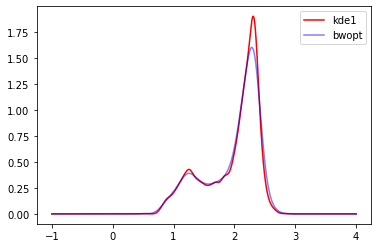

In [17]:
# for optimal information, use Knuth's rule (also for histogram bin widths)
#from astropy.stats import knuth_bin_width # doesn't work in online jupyterlab
#bwopt=knuth_bin_width(colors)
# hardwire to run in online jupyterlab
bwopt=0.09

plt.figure(1)
plt.clf()
xx = np.linspace(-1,4,10000)[:,np.newaxis]
bw1=0.05
bw2=bwopt # now comparing different binwidths for same kernel, vs. above compared different kernels for same binwidth
kde1 = KernelDensity(kernel='gaussian',bandwidth=bw1).fit(colors[:,np.newaxis])
logdens1 = kde1.score_samples(xx)
kde2 = KernelDensity(kernel='gaussian',bandwidth=bw2).fit(colors[:,np.newaxis])
logdens2 = kde2.score_samples(xx)
plt.plot(xx,np.exp(logdens1),color='red',label='kde1')
plt.plot(xx,np.exp(logdens2),color='blue',alpha=0.5,label='bwopt')
plt.legend(loc="best")

In [19]:
# Compare color distributions for galaxies at closer and further distances
nearby = (cz[goodur] > 5500.) # redshift is a proxy for distance
selenvnear = np.where(nearby)
selenvfar = np.where(~nearby)

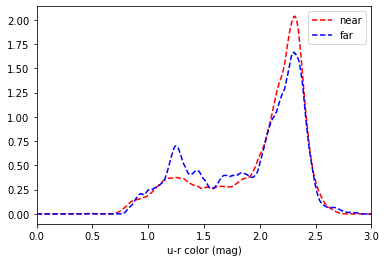

In [20]:
plt.figure(2)
plt.clf()
plt.xlim(0,3)
bw = bwopt
kde = KernelDensity(kernel='epanechnikov',bandwidth=bw).fit(colors[selenvnear][:,np.newaxis])
logdens = kde.score_samples(xx)
plt.plot(xx,np.exp(logdens),'r--',label="near")
kde = KernelDensity(kernel='epanechnikov',bandwidth=bw).fit(colors[selenvfar][:,np.newaxis])
logdens = kde.score_samples(xx)
plt.plot(xx,np.exp(logdens),'b--',label="far")
plt.xlabel("u-r color (mag)")
plt.legend()

## Distribution Tests
The Mann-Whitney U test is mostly sensitive to differences between the distribution medians, while the Kolmogorov-Smirnov test is more sensitive to shape/spread differences. Note that the K-S test cannot be used for samples with repeated values. Perhaps obviously, these tests should never be used to compare a model with the data used to determine that model's parameters. They are most useful to compare two different data sets.

In [21]:
# Use the Kolmogorov-Smirnov and Mann-Whitney U tests to compare distributions
DD, pnullks = stats.ks_2samp(colors[selenvnear],colors[selenvfar])
UU, pnullmw = stats.mannwhitneyu(colors[selenvnear],colors[selenvfar])
print("K-S pnull = %0.2g" % pnullks)
print("M-W pnull = %0.2g" % pnullmw)

K-S pnull = 0.002
M-W pnull = 0.0019


### Yikes!
These samples don't seem to be drawn from the same distribution. Any idea why?

In [27]:
# instead of separating by distance, separate randomly
namegood = name[goodur]

sample2inds = np.random.choice(len(namegood),size=int(round(0.5*len(namegood)-1)),replace=False) #note replace=False!
flag12 = np.zeros(len(namegood),dtype=int)
flag12[sample2inds] = 1
flag12 += 1
    
sample1inds = np.where(flag12 == 1)
sample2inds = np.where(flag12 == 2)

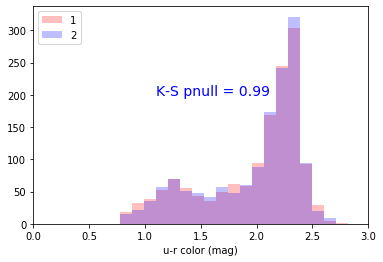

In [28]:
plt.figure(3)
plt.clf()
# for histograms, can use Freedman binwidth as 'fd' (similar to Knuth's rule, not quite as optimal)
n, bins, patches = plt.hist(colors[sample1inds],bins='fd',label='1',histtype='stepfilled',color='red',alpha=0.25)
plt.hist(colors[sample2inds],bins=bins,label='2',histtype='stepfilled',color='blue',alpha=0.25)
plt.xlim(0,3)
DD, pnullks = stats.ks_2samp(colors[sample1inds],colors[sample2inds])
plt.text(1.1, 200, "K-S pnull = %0.2g" % pnullks, size=14, color='b')
plt.xlabel("u-r color (mag)")
plt.legend()

# rerunning the randomization in the previous cell then this plot over and over should give you a sense of how much
# pnull can jump around -- remember the p-value crisis!

## Why dividing by distance didn't work
It wasn't the distance itself -- the ECO survey is volume-limited with a luminosity floor, so it has no inherent bias with distance. Also the colors are rest-frame, k-corrected, etc. However, cosmic variance in environments causes different large-scale structure in the near and far parts of the volume, which leads to changes in the relative number of red-sequence vs. blue-sequence galaxies.